# 📊 Economic Data Analysis Dashboard
## CPI, Egg Prices Analysis - Interactive Dashboard

This dashboard presents a comprehensive analysis of the relationship between Consumer Price Index (CPI) and egg prices over time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
CPI = pd.read_csv('CPIAUCSL.csv')
eggs = pd.read_csv('APU0000708111.csv')
merged_clean = pd.merge(CPI, eggs, on='observation_date').dropna()

---
## 🎯 Summary

This dashboard demonstrates:
1. **Full Dataset Analysis**: Shows the relationship between CPI and egg prices using all available data
2. **Historical Analysis**: Analyzes the same relationship excluding the last 11 years to see if patterns have changed
3. **Model Performance**: Compares predictive accuracy between both datasets

**To run this dashboard interactively**: Use `voila Demo_Dash.ipynb` in the terminal

## 📈 Section 1: Full Dataset Analysis

### Plot 1: CPI vs Egg Prices with Linear Regression

In [3]:
# Prepare merged dataset
merged = pd.merge(CPI, eggs, on='observation_date')
merged['observation_date'] = pd.to_datetime(merged['observation_date'])
merged = merged.dropna()

print(f"📅 Data range: {merged['observation_date'].min().date()} to {merged['observation_date'].max().date()}")
print(f"📋 Number of observations: {len(merged)}")

📅 Data range: 1980-01-01 to 2025-11-01
📋 Number of observations: 550


### Plot 2: Residuals Over Time

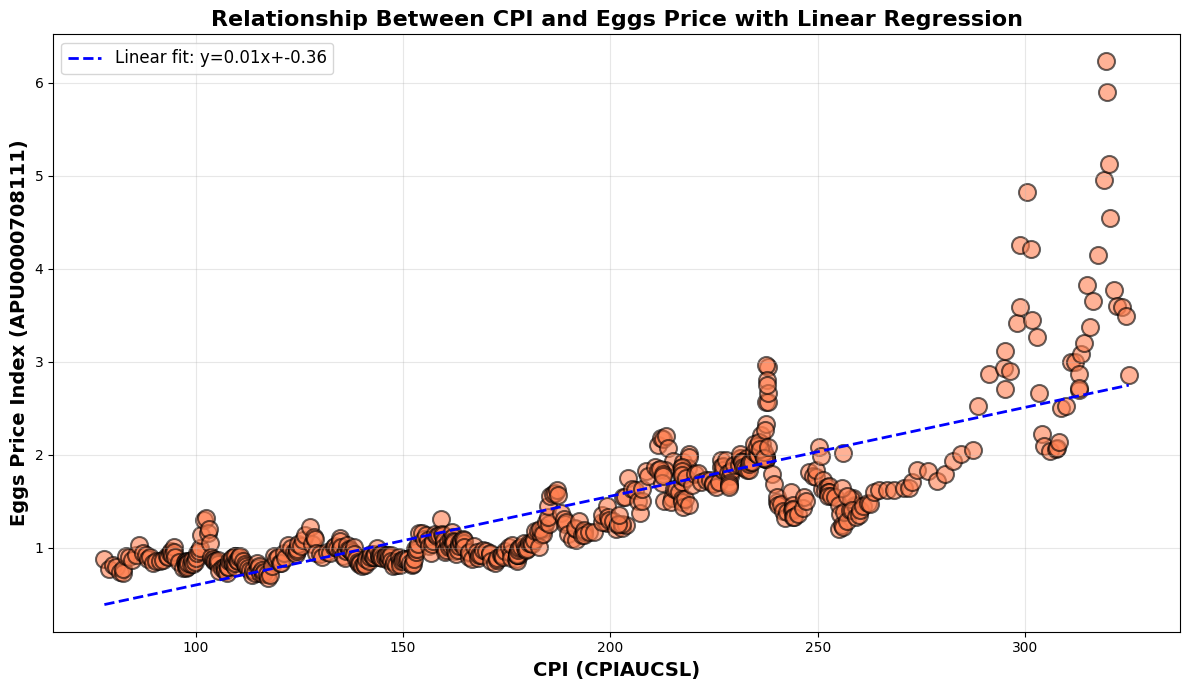

📊 Linear regression equation: Eggs = 0.01 * CPI + -0.36
📈 Correlation coefficient between CPI and Eggs: 0.7970


In [4]:
# Create scatter plot with linear regression line
plt.figure(figsize=(12, 7))

# Create scatter plot
plt.scatter(merged['CPIAUCSL'], merged['APU0000708111'], 
            s=150, alpha=0.6, c='coral', edgecolors='black', linewidth=1.5)

# Calculate and plot linear regression line
z = np.polyfit(merged['CPIAUCSL'], merged['APU0000708111'], 1)
p = np.poly1d(z)

# Add residuals to the dataframe
merged['residual'] = merged['APU0000708111'] - p(merged['CPIAUCSL'])
plt.plot(merged['CPIAUCSL'], p(merged['CPIAUCSL']), 
         "b--", linewidth=2, label=f'Linear fit: y={z[0]:.2f}x+{z[1]:.2f}')

plt.xlabel('CPI (CPIAUCSL)', fontsize=14, fontweight='bold')
plt.ylabel('Eggs Price Index (APU0000708111)', fontsize=14, fontweight='bold')
plt.title('Relationship Between CPI and Eggs Price with Linear Regression', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"📊 Linear regression equation: Eggs = {z[0]:.2f} * CPI + {z[1]:.2f}")
correlation = merged['CPIAUCSL'].corr(merged['APU0000708111'])
print(f"📈 Correlation coefficient between CPI and Eggs: {correlation:.4f}")

### Model Performance - Full Dataset

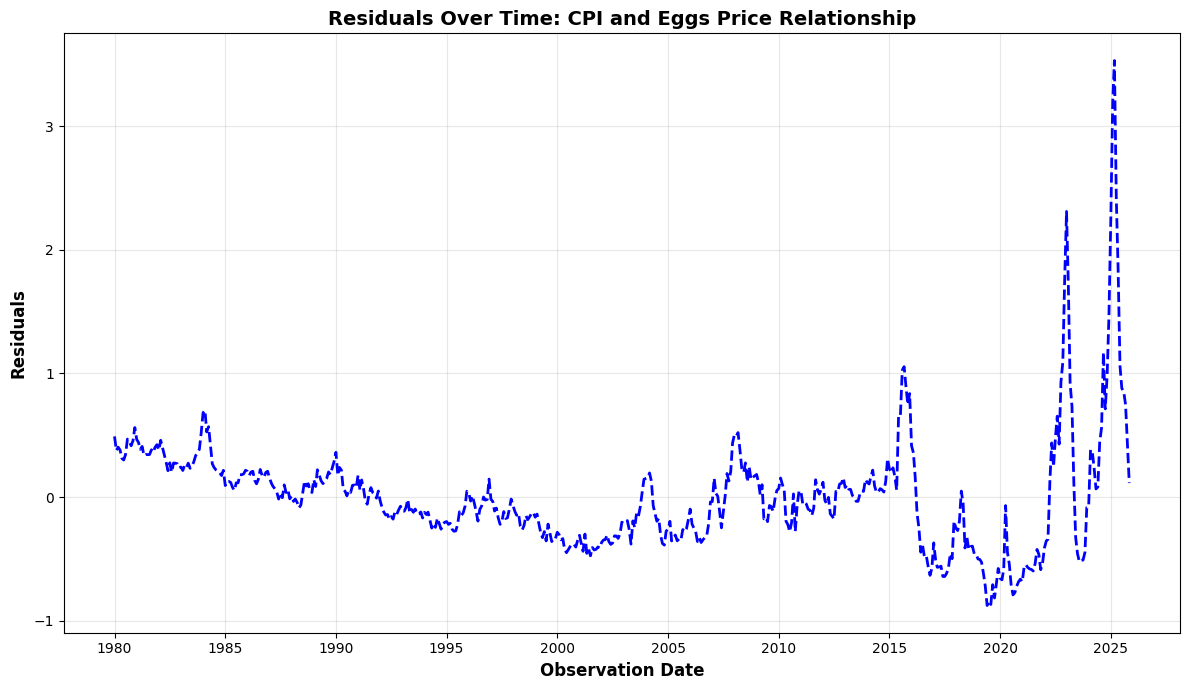

Linear regression equation: Eggs = 0.01 * CPI + -0.36
Correlation coefficient between CPI and Eggs: 0.80


In [5]:
plt.figure(figsize=(12, 7))
plt.plot(merged['observation_date'], merged['residual'], "b--", linewidth=2)

plt.xlabel('Observation Date', fontsize=12, fontweight='bold')
plt.ylabel('Residuals', fontsize=12, fontweight='bold')
plt.title('Residuals Over Time: CPI and Eggs Price Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Linear regression equation: Eggs = {z[0]:.2f} * CPI + {z[1]:.2f}")
correlation = merged['CPIAUCSL'].corr(merged['APU0000708111'])
print(f"Correlation coefficient between CPI and Eggs: {correlation:.2f}")

## 📉 Section 2: Historical Analysis (Excluding Last 11 Years)

In [6]:
# Remove the last 11 years from the data
CPI['observation_date'] = pd.to_datetime(CPI['observation_date'])
eggs['observation_date'] = pd.to_datetime(eggs['observation_date'])

# Calculate the cutoff date (11 years ago from the latest date)
latest_date = max(CPI['observation_date'].max(), eggs['observation_date'].max())
cutoff_date = latest_date - pd.DateOffset(years=11)

# Filter both dataframes
CPI_New = CPI[CPI['observation_date'] < cutoff_date]
eggs_New = eggs[eggs['observation_date'] < cutoff_date]

# Merge filtered data
merged_clean = pd.merge(CPI_New, eggs_New, on='observation_date')
merged_clean['observation_date'] = pd.to_datetime(merged_clean['observation_date'])
merged_clean = merged_clean.dropna()

print(f"📅 Filtered data range: {merged_clean['observation_date'].min().date()} to {merged_clean['observation_date'].max().date()}")
print(f"📋 Number of observations: {len(merged_clean)}")

📅 Filtered data range: 1980-01-01 to 2014-10-01
📋 Number of observations: 418


### Plot 3: CPI vs Egg Prices (Historical Data)

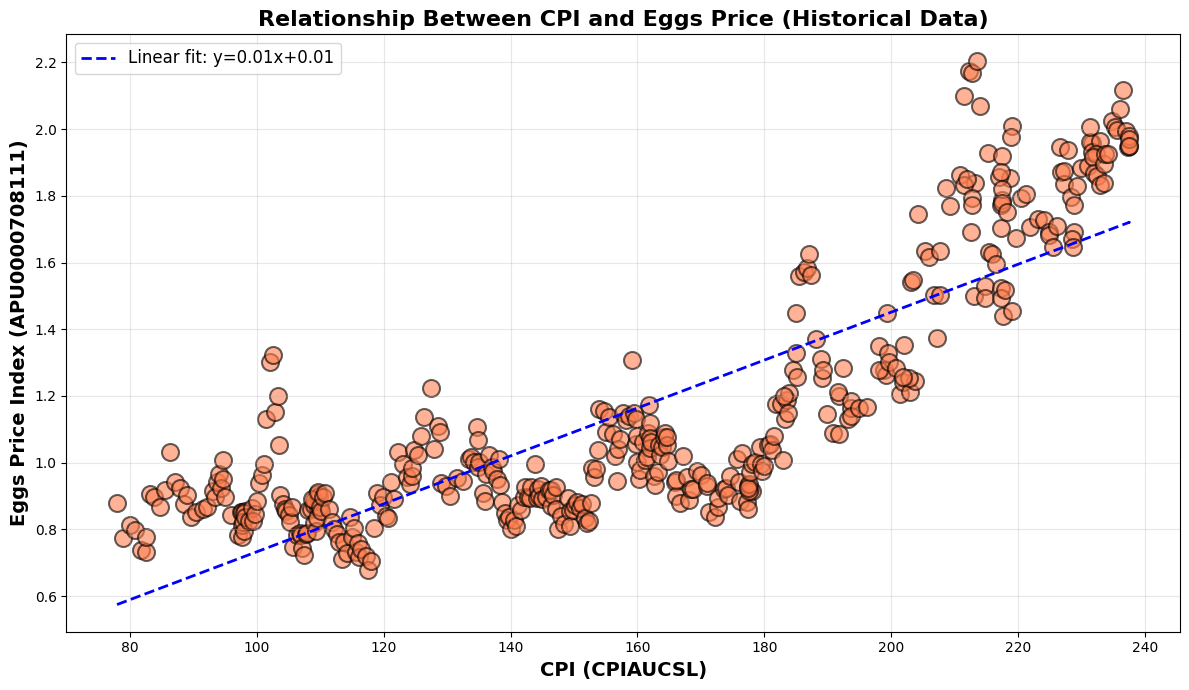

📊 Linear regression equation: Eggs = 0.01 * CPI + 0.01
📈 Correlation coefficient between CPI and Eggs: 0.8365


In [7]:
# Create scatter plot with linear regression line for historical data
plt.figure(figsize=(12, 7))

# Create scatter plot
plt.scatter(merged_clean['CPIAUCSL'], merged_clean['APU0000708111'], 
            s=150, alpha=0.6, c='coral', edgecolors='black', linewidth=1.5)

# Calculate and plot linear regression line
z_clean = np.polyfit(merged_clean['CPIAUCSL'], merged_clean['APU0000708111'], 1)
p_clean = np.poly1d(z_clean)

# Add residuals to the dataframe
merged_clean['residual'] = merged_clean['APU0000708111'] - p_clean(merged_clean['CPIAUCSL'])
plt.plot(merged_clean['CPIAUCSL'], p_clean(merged_clean['CPIAUCSL']), 
         "b--", linewidth=2, label=f'Linear fit: y={z_clean[0]:.2f}x+{z_clean[1]:.2f}')

plt.xlabel('CPI (CPIAUCSL)', fontsize=14, fontweight='bold')
plt.ylabel('Eggs Price Index (APU0000708111)', fontsize=14, fontweight='bold')
plt.title('Relationship Between CPI and Eggs Price (Historical Data)', 
          fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"📊 Linear regression equation: Eggs = {z_clean[0]:.2f} * CPI + {z_clean[1]:.2f}")
correlation_clean = merged_clean['CPIAUCSL'].corr(merged_clean['APU0000708111'])
print(f"📈 Correlation coefficient between CPI and Eggs: {correlation_clean:.4f}")

### Plot 4: Residuals Over Time (Historical Data)

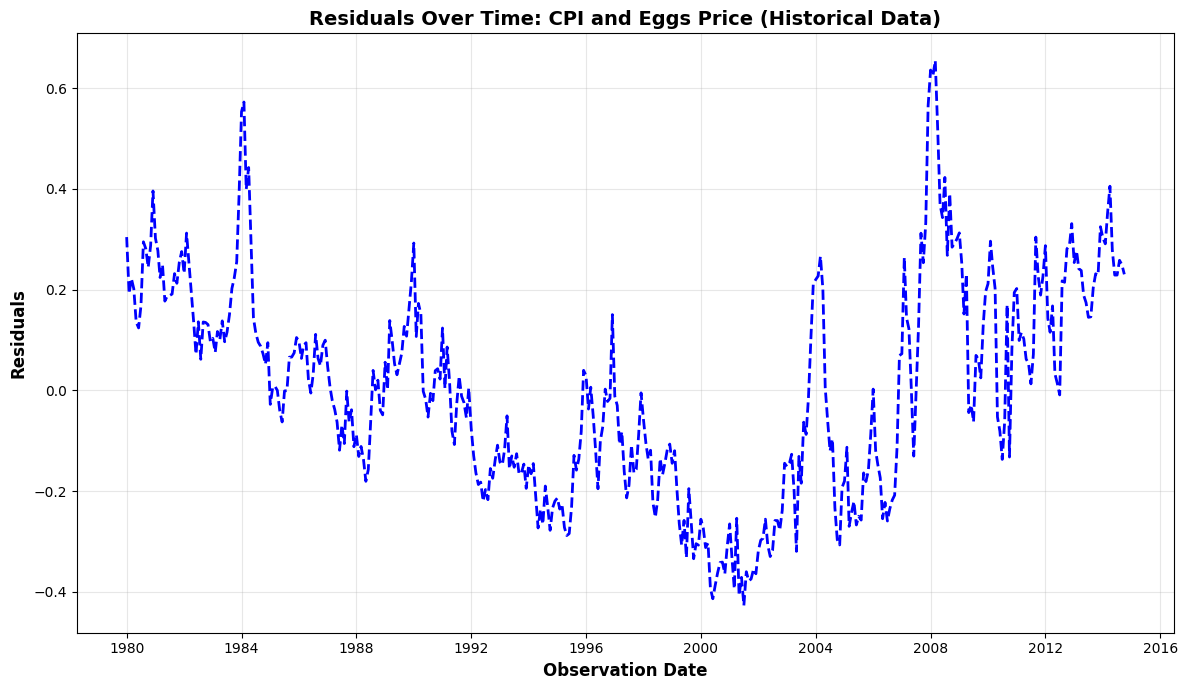

Linear regression equation: Eggs = 0.01 * CPI + 0.01
Correlation coefficient between CPI and Eggs: 0.84


In [8]:
plt.figure(figsize=(12, 7))
plt.plot(merged_clean['observation_date'], merged_clean['residual'], "b--", linewidth=2)

plt.xlabel('Observation Date', fontsize=12, fontweight='bold')
plt.ylabel('Residuals', fontsize=12, fontweight='bold')
plt.title('Residuals Over Time: CPI and Eggs Price (Historical Data)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

print(f"Linear regression equation: Eggs = {z_clean[0]:.2f} * CPI + {z_clean[1]:.2f}")
correlation_clean = merged_clean['CPIAUCSL'].corr(merged_clean['APU0000708111'])
print(f"Correlation coefficient between CPI and Eggs: {correlation_clean:.2f}")

### Model Performance - Historical Dataset

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Prepare data for modeling - historical dataset
X_clean = merged_clean[['CPIAUCSL']]
y_clean = merged_clean['APU0000708111']

# Split the data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0)

# Train the model
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)
pred_clean = model_clean.predict(X_test_clean)

# Calculate metrics
mae_clean = mean_absolute_error(y_test_clean, pred_clean)
mse_clean = mean_squared_error(y_test_clean, pred_clean)
r2_clean = r2_score(y_test_clean, pred_clean)
rmse_clean = np.sqrt(mse_clean)

print(f"📊 Model Accuracy Metrics (Historical Dataset):")
print(f"Mean Absolute Error (MAE): {mae_clean:.4f}")
print(f"Mean Squared Error (MSE): {mse_clean:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_clean:.4f}")
print(f"R² Score: {r2_clean:.4f}")
print(f"\n✅ The model explains {r2_clean*100:.2f}% of the variance in egg prices.")

📊 Model Accuracy Metrics (Historical Dataset):
Mean Absolute Error (MAE): 0.1749
Mean Squared Error (MSE): 0.0433
Root Mean Squared Error (RMSE): 0.2081
R² Score: 0.6901

✅ The model explains 69.01% of the variance in egg prices.
